# Canadian Yield Curve Analysis

## Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.dates as dates
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.dates as dates
import matplotlib.ticker as ticker
# importing the principal component analysis in Python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
for creating a responsive plot
%matplotlib widget

## Data Preparation

In [2]:
df = pd.read_csv('yield_curves_CAN.csv')

# Select the desired columns
df = df[['Date', ' ZC025YR', ' ZC050YR', ' ZC100YR', ' ZC200YR', ' ZC300YR', ' ZC500YR', ' ZC700YR', ' ZC1000YR']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2599 non-null   object
 1    ZC025YR   2599 non-null   object
 2    ZC050YR   2599 non-null   object
 3    ZC100YR   2599 non-null   object
 4    ZC200YR   2599 non-null   object
 5    ZC300YR   2599 non-null   object
 6    ZC500YR   2599 non-null   object
 7    ZC700YR   2599 non-null   object
 8    ZC1000YR  2599 non-null   object
dtypes: object(9)
memory usage: 182.9+ KB


In [3]:
# For each column in the dataframe
for col in df.columns:
    
    # Convert date string to datetime
    if col == 'Date':
        df['Date'] = pd.to_datetime(df["Date"],format='%Y-%m-%d').dt.date
        continue
    
    # Convert string values to numeric
    # errors='coerce': sets values that cannot be converted to numeric (which in our case ar ' na' ) into NAN. 
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Set date as the index of the dataframe
df = df.set_index('Date')

In [4]:
# Drop rows that has null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 2013-02-01 to 2023-01-18
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    ZC025YR   2477 non-null   float64
 1    ZC050YR   2477 non-null   float64
 2    ZC100YR   2477 non-null   float64
 3    ZC200YR   2477 non-null   float64
 4    ZC300YR   2477 non-null   float64
 5    ZC500YR   2477 non-null   float64
 6    ZC700YR   2477 non-null   float64
 7    ZC1000YR  2477 non-null   float64
dtypes: float64(8)
memory usage: 174.2+ KB


In [5]:
# Array of records
dfn = df.to_records()
dfn

rec.array([(datetime.date(2013, 2, 1), 0.00969205, 0.01028767, 0.01095493, 0.01215536, 0.01341628, 0.01597058, 0.018332  , 0.02137715),
           (datetime.date(2013, 2, 4), 0.00972975, 0.01020215, 0.01073783, 0.01179182, 0.01297196, 0.01544718, 0.01778556, 0.0208644 ),
           (datetime.date(2013, 2, 5), 0.00968997, 0.010172  , 0.01079456, 0.01194821, 0.01316486, 0.01569027, 0.01809235, 0.02122185),
           ...,
           (datetime.date(2023, 1, 16), 0.0442304 , 0.046102  , 0.0467257 , 0.0357715 , 0.0320952 , 0.0285735 , 0.0276656 , 0.0285704 ),
           (datetime.date(2023, 1, 17), 0.0444394 , 0.0459416 , 0.0464593 , 0.0355773 , 0.0318329 , 0.0283299 , 0.0275254 , 0.0285402 ),
           (datetime.date(2023, 1, 18), 0.0443059 , 0.0453859 , 0.0454901 , 0.034655  , 0.0306637 , 0.0269998 , 0.0262038 , 0.0273282 )],
          dtype=[('Date', 'O'), (' ZC025YR', '<f8'), (' ZC050YR', '<f8'), (' ZC100YR', '<f8'), (' ZC200YR', '<f8'), (' ZC300YR', '<f8'), (' ZC500YR', '<f8'), (' ZC7

## Figures

### `01-` Yield Curve Observed at a Given Date

In [6]:
# Auxialary dataframe with 4 observations (quarter) for each year
new_df = df.copy()
# reset index to convert date from index to column
new_df = new_df.reset_index()

# Convert date to date time
new_df["Date"] = pd.to_datetime(new_df["Date"],format='%Y-%m-%d')

# Select only observations in March, June, Sep, Dec
new_df = new_df[(new_df.Date.dt.month).isin([3, 6, 9, 12])]

# Group by year and month and select the last date of each group
df_to_plot = new_df.groupby([new_df.Date.dt.year, new_df.Date.dt.month]).last().set_index('Date')
df_to_plot.head(10)

,ZC025YR,ZC050YR,ZC100YR,ZC200YR,ZC300YR,ZC500YR,ZC700YR,ZC1000YR
Date,,,,,,,,
2013-03-28,0.010172,0.010309,0.009985,0.010159,0.011080,0.013407,0.015603,0.018774
2013-06-28,0.010590,0.010867,0.011119,0.012195,0.014088,0.018367,0.021582,0.024590
2013-09-30,0.010109,0.010241,0.010365,0.011856,0.014191,0.018873,0.022444,0.026120
2013-12-31,0.010307,0.010229,0.009737,0.011002,0.013858,0.019941,0.024491,0.028668
2014-03-31,0.009546,0.009758,0.009699,0.010679,0.012610,0.016987,0.020729,0.024861
2014-06-30,0.009884,0.009933,0.009936,0.010935,0.012504,0.015835,0.018987,0.023007
2014-09-30,0.009592,0.009710,0.009886,0.011229,0.012931,0.016039,0.018752,0.022128
2014-12-31,0.009274,0.009463,0.010042,0.009964,0.011007,0.013523,0.015758,0.018759
2015-03-31,0.005444,0.005708,0.005716,0.004725,0.005144,0.007524,0.010306,0.014199


Maturity bounds:  [0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0]


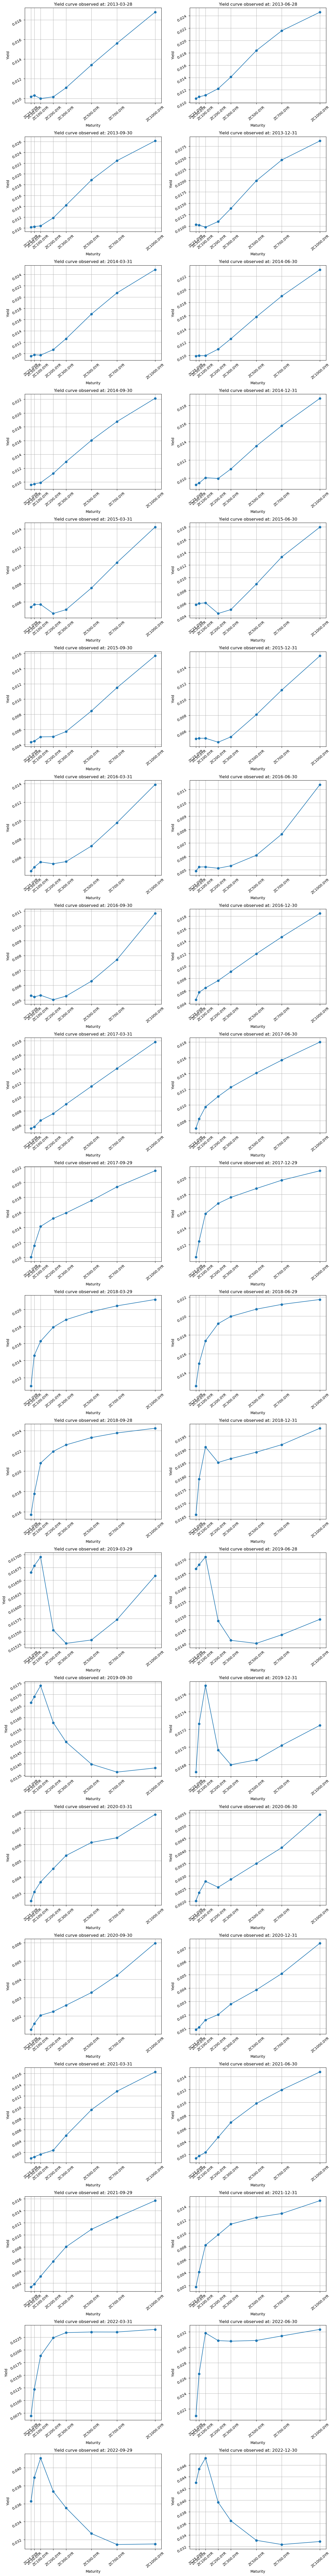

In [7]:
# get list of records of df_to_plot
df_to_plot_records = df_to_plot.to_records()

# mat.Fed <- c(3/12, 0.5, 1,2,3,5,7,10)
# Deduce it from columns names for generalization
mat_fed = [int(''.join([n for n in col_name if n.isdigit()])) / 100 for col_name in df.columns]
print("Maturity bounds: ", mat_fed)

# Reformat Maturity data back to dates
def format_maturity(x, pos=None):
     return "ZC" + str(x * 100) + "YR"
    
# subplots
# Define number of subplots and figure size
fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(13, 100))

# Plot
for axis, row in zip(axes.flatten().tolist(), df_to_plot_records):
    axis.title.set_text(f"Yield curve observed at: {list(row)[0].astype('datetime64[D]')}")
    axis.plot(mat_fed, list(row)[1:], '-o')
    axis.set_xlabel('Maturity')
    axis.set_ylabel('Yield')
    axis.xaxis.set_ticks(mat_fed)
    # Reformat x axis
    axis.xaxis.set_major_formatter(ticker.FuncFormatter(format_maturity))
    
    # Rotate ticklabels
    plt.setp(axis.xaxis.get_majorticklabels(), rotation=40)
    plt.setp(axis.yaxis.get_majorticklabels(), rotation=30)
    
    axis.grid()
fig.tight_layout()

### `02-` 3D Yield Curve

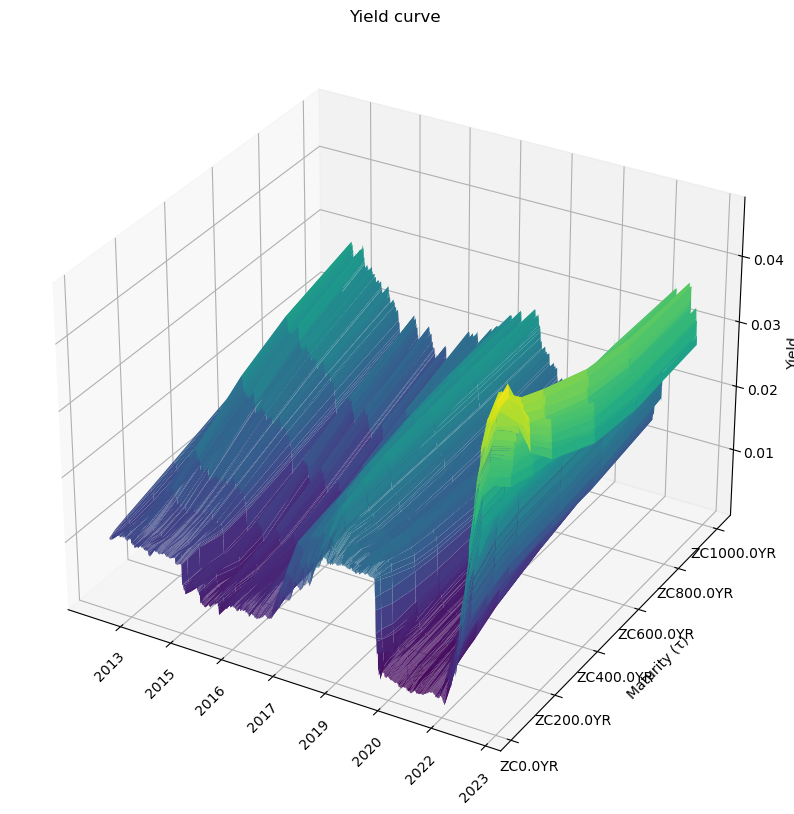

In [8]:
# We create three empty lists 
x_data = []
y_data = []
z_data = []

# Convert dates to numbers to be able to plot it
for dt in dfn.Date:
    dt_num = dates.date2num(dt)
    x_data.append([dt_num for i in range(len(dfn.dtype.names)-1)])


for row in dfn:
    y_data.append(mat_fed)
    z_data.append(list(row.tolist()[1:]))


# x: Dates
# y: Maturities
# z: Yields
x = np.array(x_data, dtype='f')
y = np.array(y_data, dtype='f')
z = np.array(z_data, dtype='f')

# Set figure size
fig = plt.figure(figsize=(15, 10))

# Define 3D graph
ax = plt.axes(projection='3d')

# Plot the data
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap='viridis', vmin=np.nanmin(z), vmax=np.nanmax(z))

# Set labels for each axis
ax.set_title('Yield curve')
ax.set_ylabel('Maturity (\u03C4)')
ax.set_zlabel('Yield')

# Reformat x data back to dates
def format_date(x, pos=None):
     return dates.num2date(x).strftime('%Y')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

# Set the angle of years labels
for tl in ax.xaxis.get_ticklabels():
    tl.set_rotation(45)

axis.xaxis.set_ticks(mat_fed)
# Reformat x axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_maturity))

# Rotate ticklabels
plt.setp(axis.xaxis.get_majorticklabels(), rotation=40)
plt.setp(axis.yaxis.get_majorticklabels(), rotation=30)
    
fig.tight_layout()

### `03-` PCA Analysis

> PCA Components vs Years

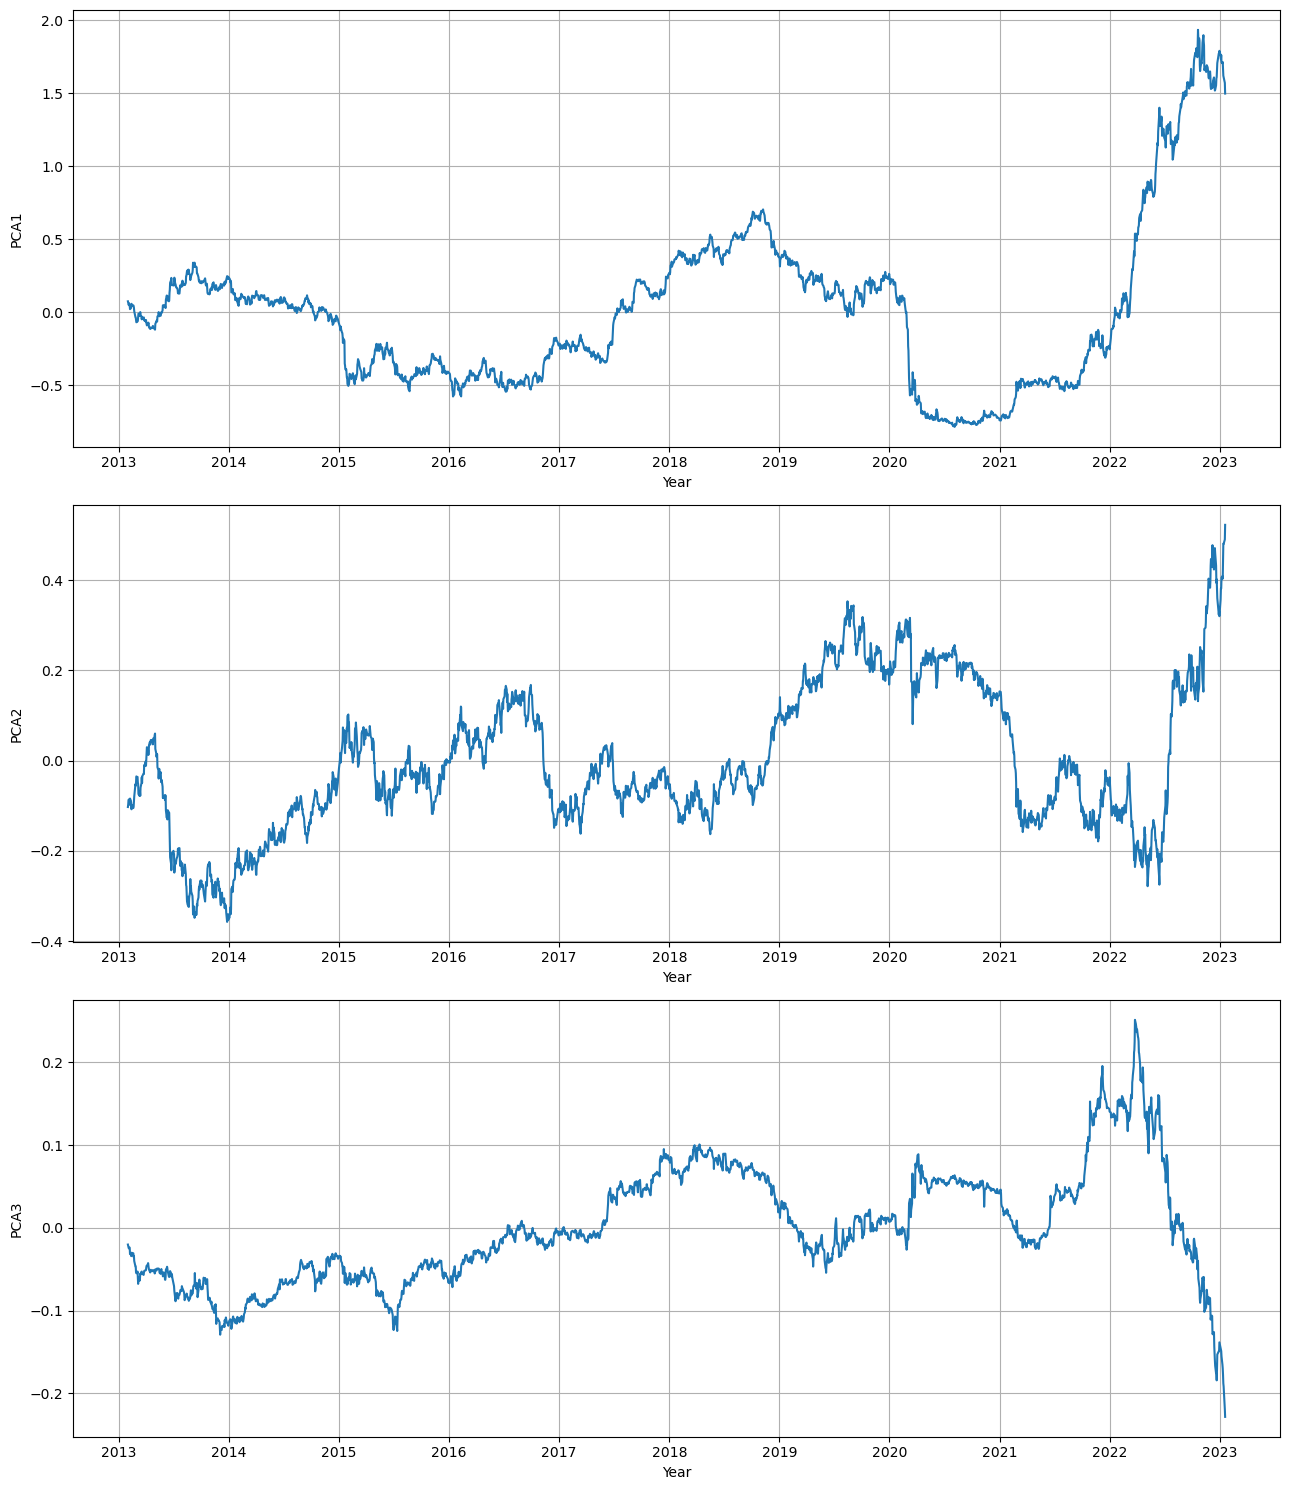

In [9]:
# Scaling data
# ------------------------------------------------------- Select a scalar --------------------------------------------------
# Standard scaling
std_scaler = StandardScaler()
std_scaled_df = std_scaler.fit_transform(df)

# Normalizing
min_max_scaler = MinMaxScaler()
normalized_df = min_max_scaler.fit_transform(df)

scaled_df = normalized_df
# -------------------------------------------------------------------------------------------------------------------------

# principal component analysis in Python
pca = PCA()

# Training the principal component analysis in Python
PCA_components = pca.fit_transform(scaled_df)

# subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13,15))
for axis, i in zip(axes.flatten().tolist(), range(3)):
    
    axis.set_xlabel('Year')
    axis.set_ylabel(f'PCA{i+1}')
    axis.grid()
    axis.plot(df.index, PCA_components[:, [i]], '-')
    
fig.tight_layout()

> PCA Components Summary

In [10]:
components_df = pd.DataFrame(PCA_components, columns=[f'Comp {i+1}' for i in range(PCA_components.shape[1])], index = df.index).reset_index()
components_df.to_csv('PCA_Components.csv', index=False)
components_df

,Date,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6,Comp 7,Comp 8
0,2013-02-01,0.073505,-0.102777,-0.020261,0.007821,0.008660,0.001130,-0.000073,-0.000139
1,2013-02-04,0.047139,-0.086028,-0.024864,0.007489,0.009098,0.000858,-0.000086,-0.000072
2,2013-02-05,0.059859,-0.097815,-0.024059,0.006846,0.009927,0.000502,-0.000528,-0.000241
3,2013-02-06,0.049192,-0.089618,-0.024012,0.007293,0.009830,0.000472,-0.000469,-0.000193
4,2013-02-07,0.044570,-0.093531,-0.023914,0.008057,0.010097,0.000023,-0.000467,-0.000168
...,...,...,...,...,...,...,...,...,...
2472,2023-01-12,1.619139,0.480824,-0.188095,-0.050302,-0.025409,-0.006081,0.003525,-0.000821
2473,2023-01-13,1.609806,0.480307,-0.191694,-0.051584,-0.024731,-0.006047,0.001764,-0.000597
2474,2023-01-16,1.580483,0.488110,-0.211352,-0.049639,-0.029458,-0.011710,0.008065,0.001411
2475,2023-01-17,1.569911,0.490088,-0.219335,-0.047743,-0.025676,-0.013621,0.005952,0.001427


In [11]:
# Components Summary
std = PCA_components.std(axis=0)
index = ['Standard Deviation', 'Portion of Variance', 'Cumulated Portion of Variance']
portion_of_variation = pca.explained_variance_ratio_
portion_of_variation_cumulated = portion_of_variation.cumsum()
summary = pd.DataFrame([std, portion_of_variation, portion_of_variation_cumulated], columns=[f'Comp {i+1}' for i in range(PCA_components.shape[1])], index=index)
summary

,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6,Comp 7,Comp 8
Standard Deviation,0.537161,0.159792,0.069307,0.021526,0.008879,0.004733,0.004448,0.000942
Portion of Variance,0.903206,0.079926,0.015036,0.001450,0.000247,0.000070,0.000062,0.000003
Cumulated Portion of Variance,0.903206,0.983132,0.998168,0.999618,0.999865,0.999935,0.999997,1.000000


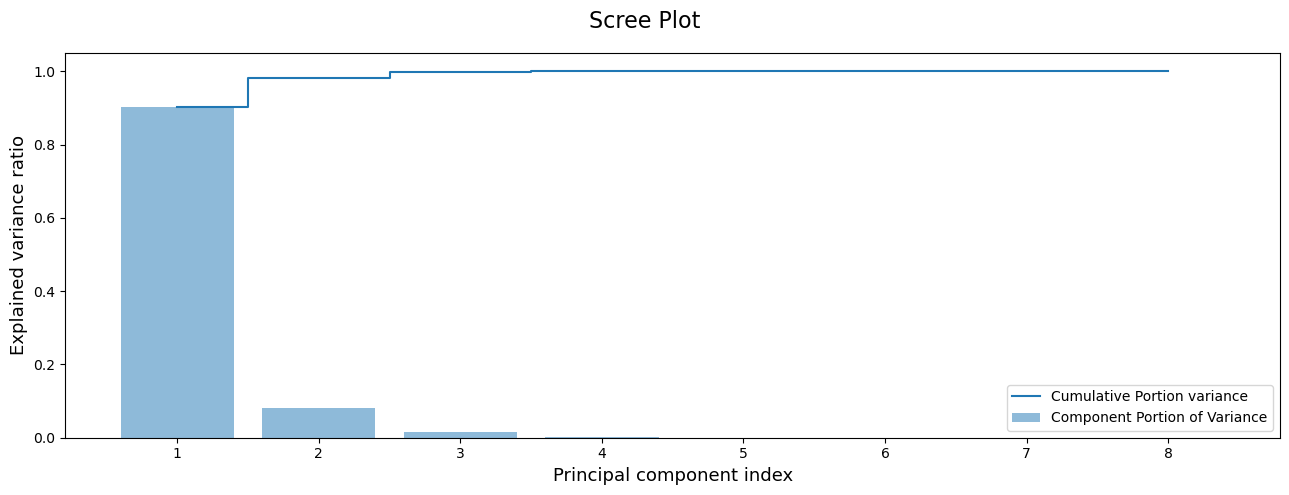

In [12]:
# Create the visualization plot
#
plt.figure(figsize=(13, 5))

# Component Portion of Variance
plt.bar(range(1,len(portion_of_variation) + 1), portion_of_variation, alpha=0.5, align='center', label='Component Portion of Variance')

# Cumulative Portion variance
plt.step(range(1,len(portion_of_variation_cumulated)+1), portion_of_variation_cumulated, where='mid',label='Cumulative Portion variance')
plt.ylabel('Explained variance ratio', fontsize=13)
plt.xlabel('Principal component index', fontsize=13)
plt.legend(loc='best')
plt.suptitle('Scree Plot', fontsize=16)
plt.tight_layout()
plt.show()

> PCA Loadings vs Maturity (in years)

In [13]:
# Loading array 
loadings = pca.components_.T
loadings

array([[ 0.31775886,  0.39424131, -0.5537505 ,  0.43704084,  0.2756608 ,
        -0.38559721, -0.14494432,  0.01660849],
       [ 0.3406955 ,  0.35949463, -0.29416403, -0.06900654, -0.21541661,
         0.71825747,  0.31524679, -0.04143872],
       [ 0.36135429,  0.30594105,  0.07813362, -0.57000868, -0.47336237,
        -0.46708731, -0.05064626, -0.00093485],
       [ 0.37987527,  0.16016081,  0.3852954 , -0.16621157,  0.44617686,
         0.27308834, -0.55093106,  0.27710717],
       [ 0.38251009,  0.02437426,  0.45081727,  0.12348248,  0.32009255,
        -0.13728604,  0.46656409, -0.5437086 ],
       [ 0.36959389, -0.23658696,  0.24243744,  0.42204374, -0.28430738,
        -0.08656148,  0.27569588,  0.63733691],
       [ 0.35223591, -0.43188943, -0.06642689,  0.25593537, -0.39327721,
         0.11923201, -0.49422756, -0.45424862],
       [ 0.31794652, -0.59412963, -0.43109841, -0.43911897,  0.3413271 ,
        -0.04600638,  0.18859844,  0.11427396]])

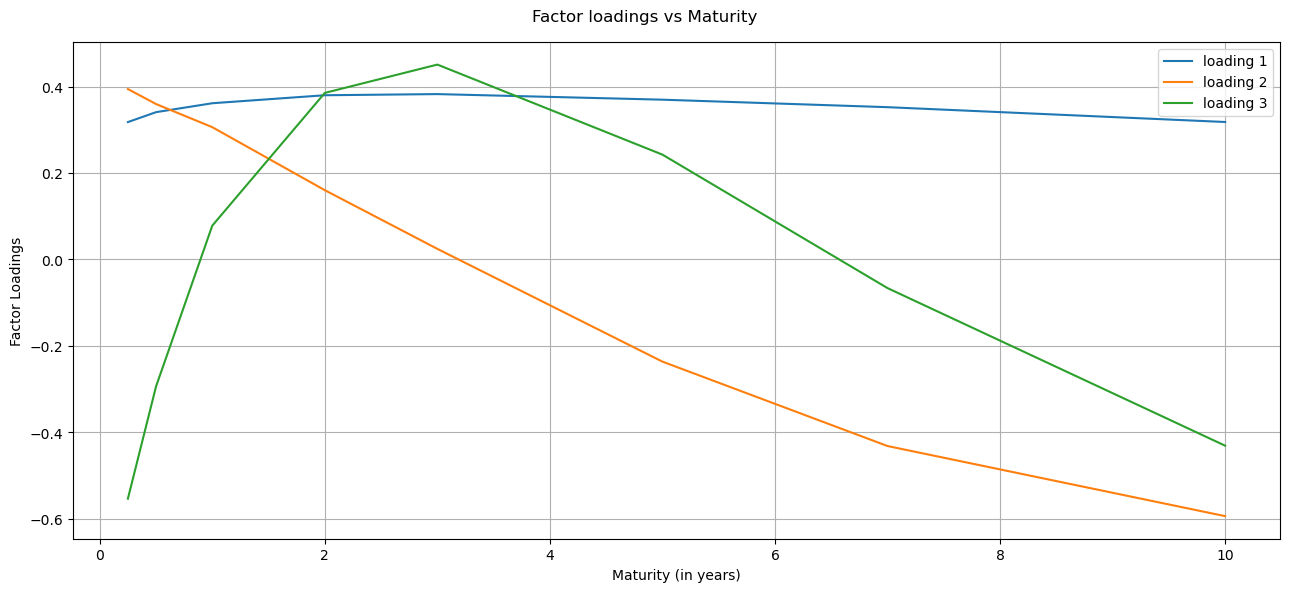

In [14]:
plt.figure(figsize=(13,6))
plt.suptitle("Factor loadings vs Maturity")
plt.xlabel('Maturity (in years)')
plt.ylabel('Factor Loadings')
for i in range(3):
    plt.plot(mat_fed, loadings[:, [i]], label=f'loading {i+1}')
    plt.legend()
plt.grid()
plt.tight_layout()